In [1]:
# Reading all necessary

import pandas as pd
import numpy as np
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting
from pandas.plotting import parallel_coordinates

# for interactive visualizations
import plotly

In [2]:
# Reading the dataset
df=pd.read_csv('imdb_top_1000.csv',header=0,na_values=['NA'])

In [3]:
df.shape

(1000, 16)

In [4]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
df.tail()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [9]:
# converting the data type of the feature "Runtime" into numerical
df['Runtime'] = df['Runtime'].str.extract('(\d+)',expand = False).astype(float)

In [11]:
df.tail()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115.0,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201.0,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118.0,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97.0,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86.0,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [12]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime          float64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [13]:
df.nunique()

Poster_Link      1000
Series_Title      999
Released_Year     100
Certificate        16
Runtime           140
Genre             202
IMDB_Rating        17
Overview         1000
Meta_score         63
Director          548
Star1             660
Star2             841
Star3             891
Star4             939
No_of_Votes       999
Gross             823
dtype: int64

In [14]:
df.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,1000.000000,843.000000,1.000000e+03
mean,122.891000,7.949300,77.971530,2.736929e+05
std,28.093671,0.275491,12.376099,3.273727e+05
min,45.000000,7.600000,28.000000,2.508800e+04
25%,103.000000,7.700000,70.000000,5.552625e+04
50%,119.000000,7.900000,79.000000,1.385485e+05
75%,137.000000,8.100000,87.000000,3.741612e+05
max,321.000000,9.300000,100.000000,2.343110e+06


### Visualization

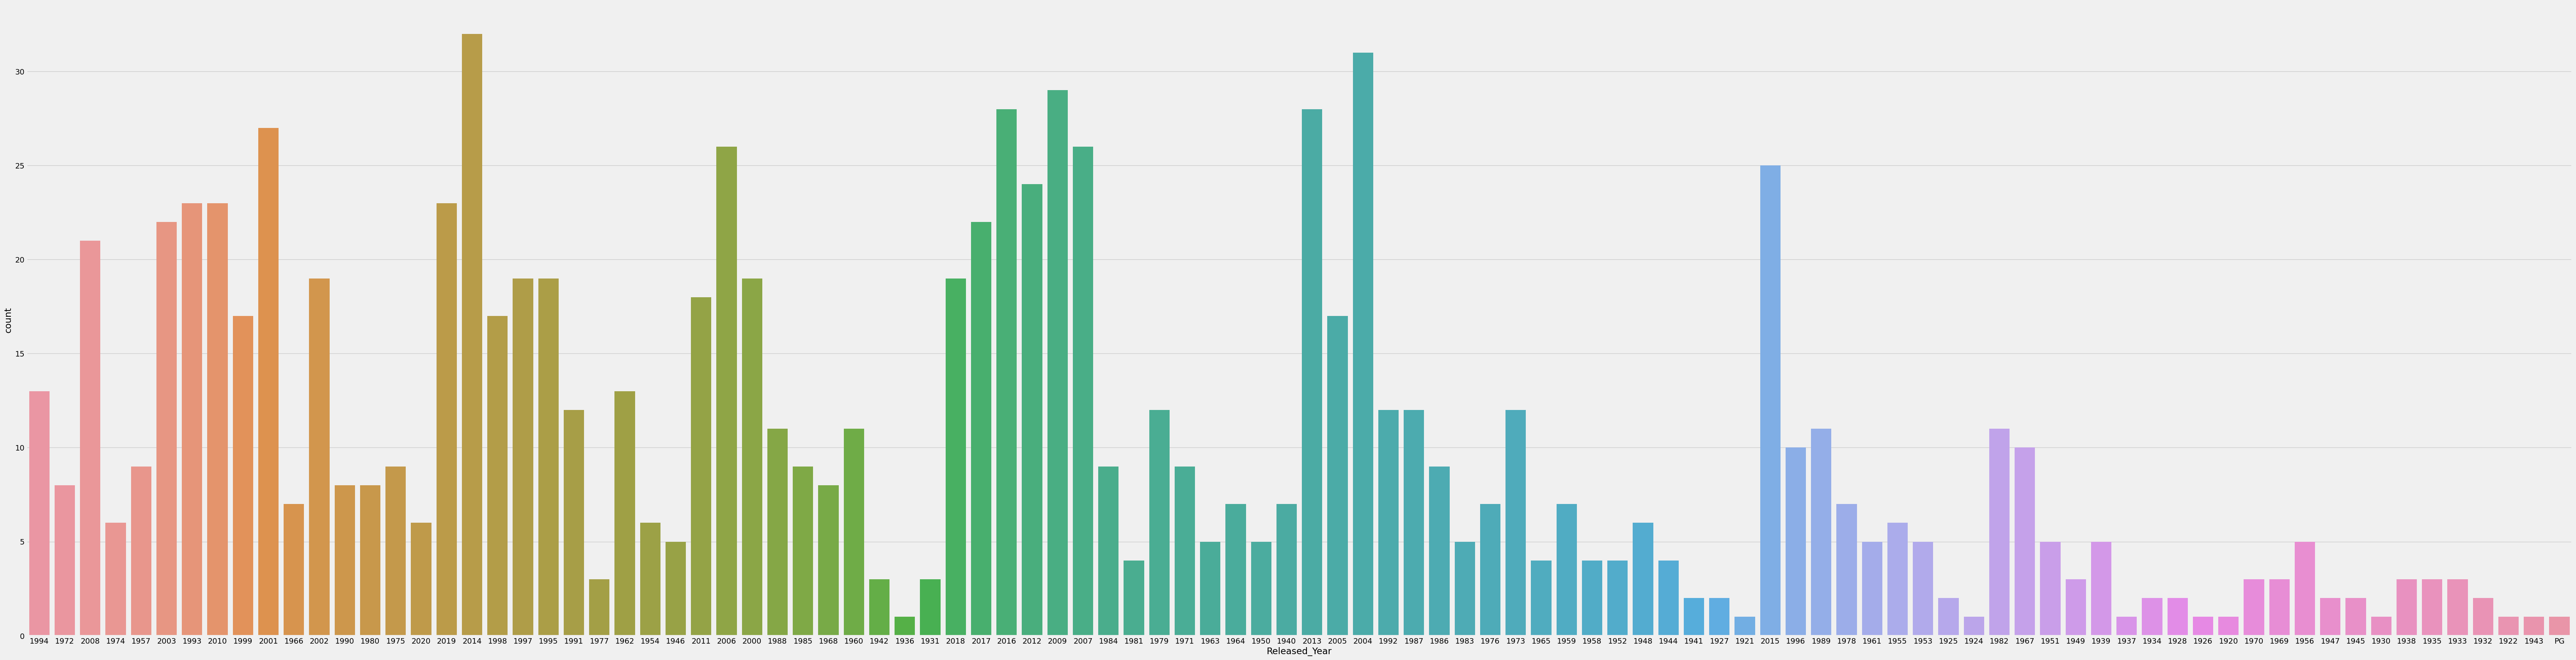

In [15]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(75,20))
ax = sns.countplot(x='Released_Year', data=df)

In [16]:
# Convert the 'Feature' column to numeric type, coercing non-numeric values to NaN
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Sort the values in ascending order
df_sorted = df.sort_values('Released_Year')

# Replace NaN with an appropriate representation
replacement_value = 'PG'
df_sorted['Released_Year'].fillna(replacement_value, inplace=True)

In [17]:
df['Released_Year'].dtypes

dtype('float64')

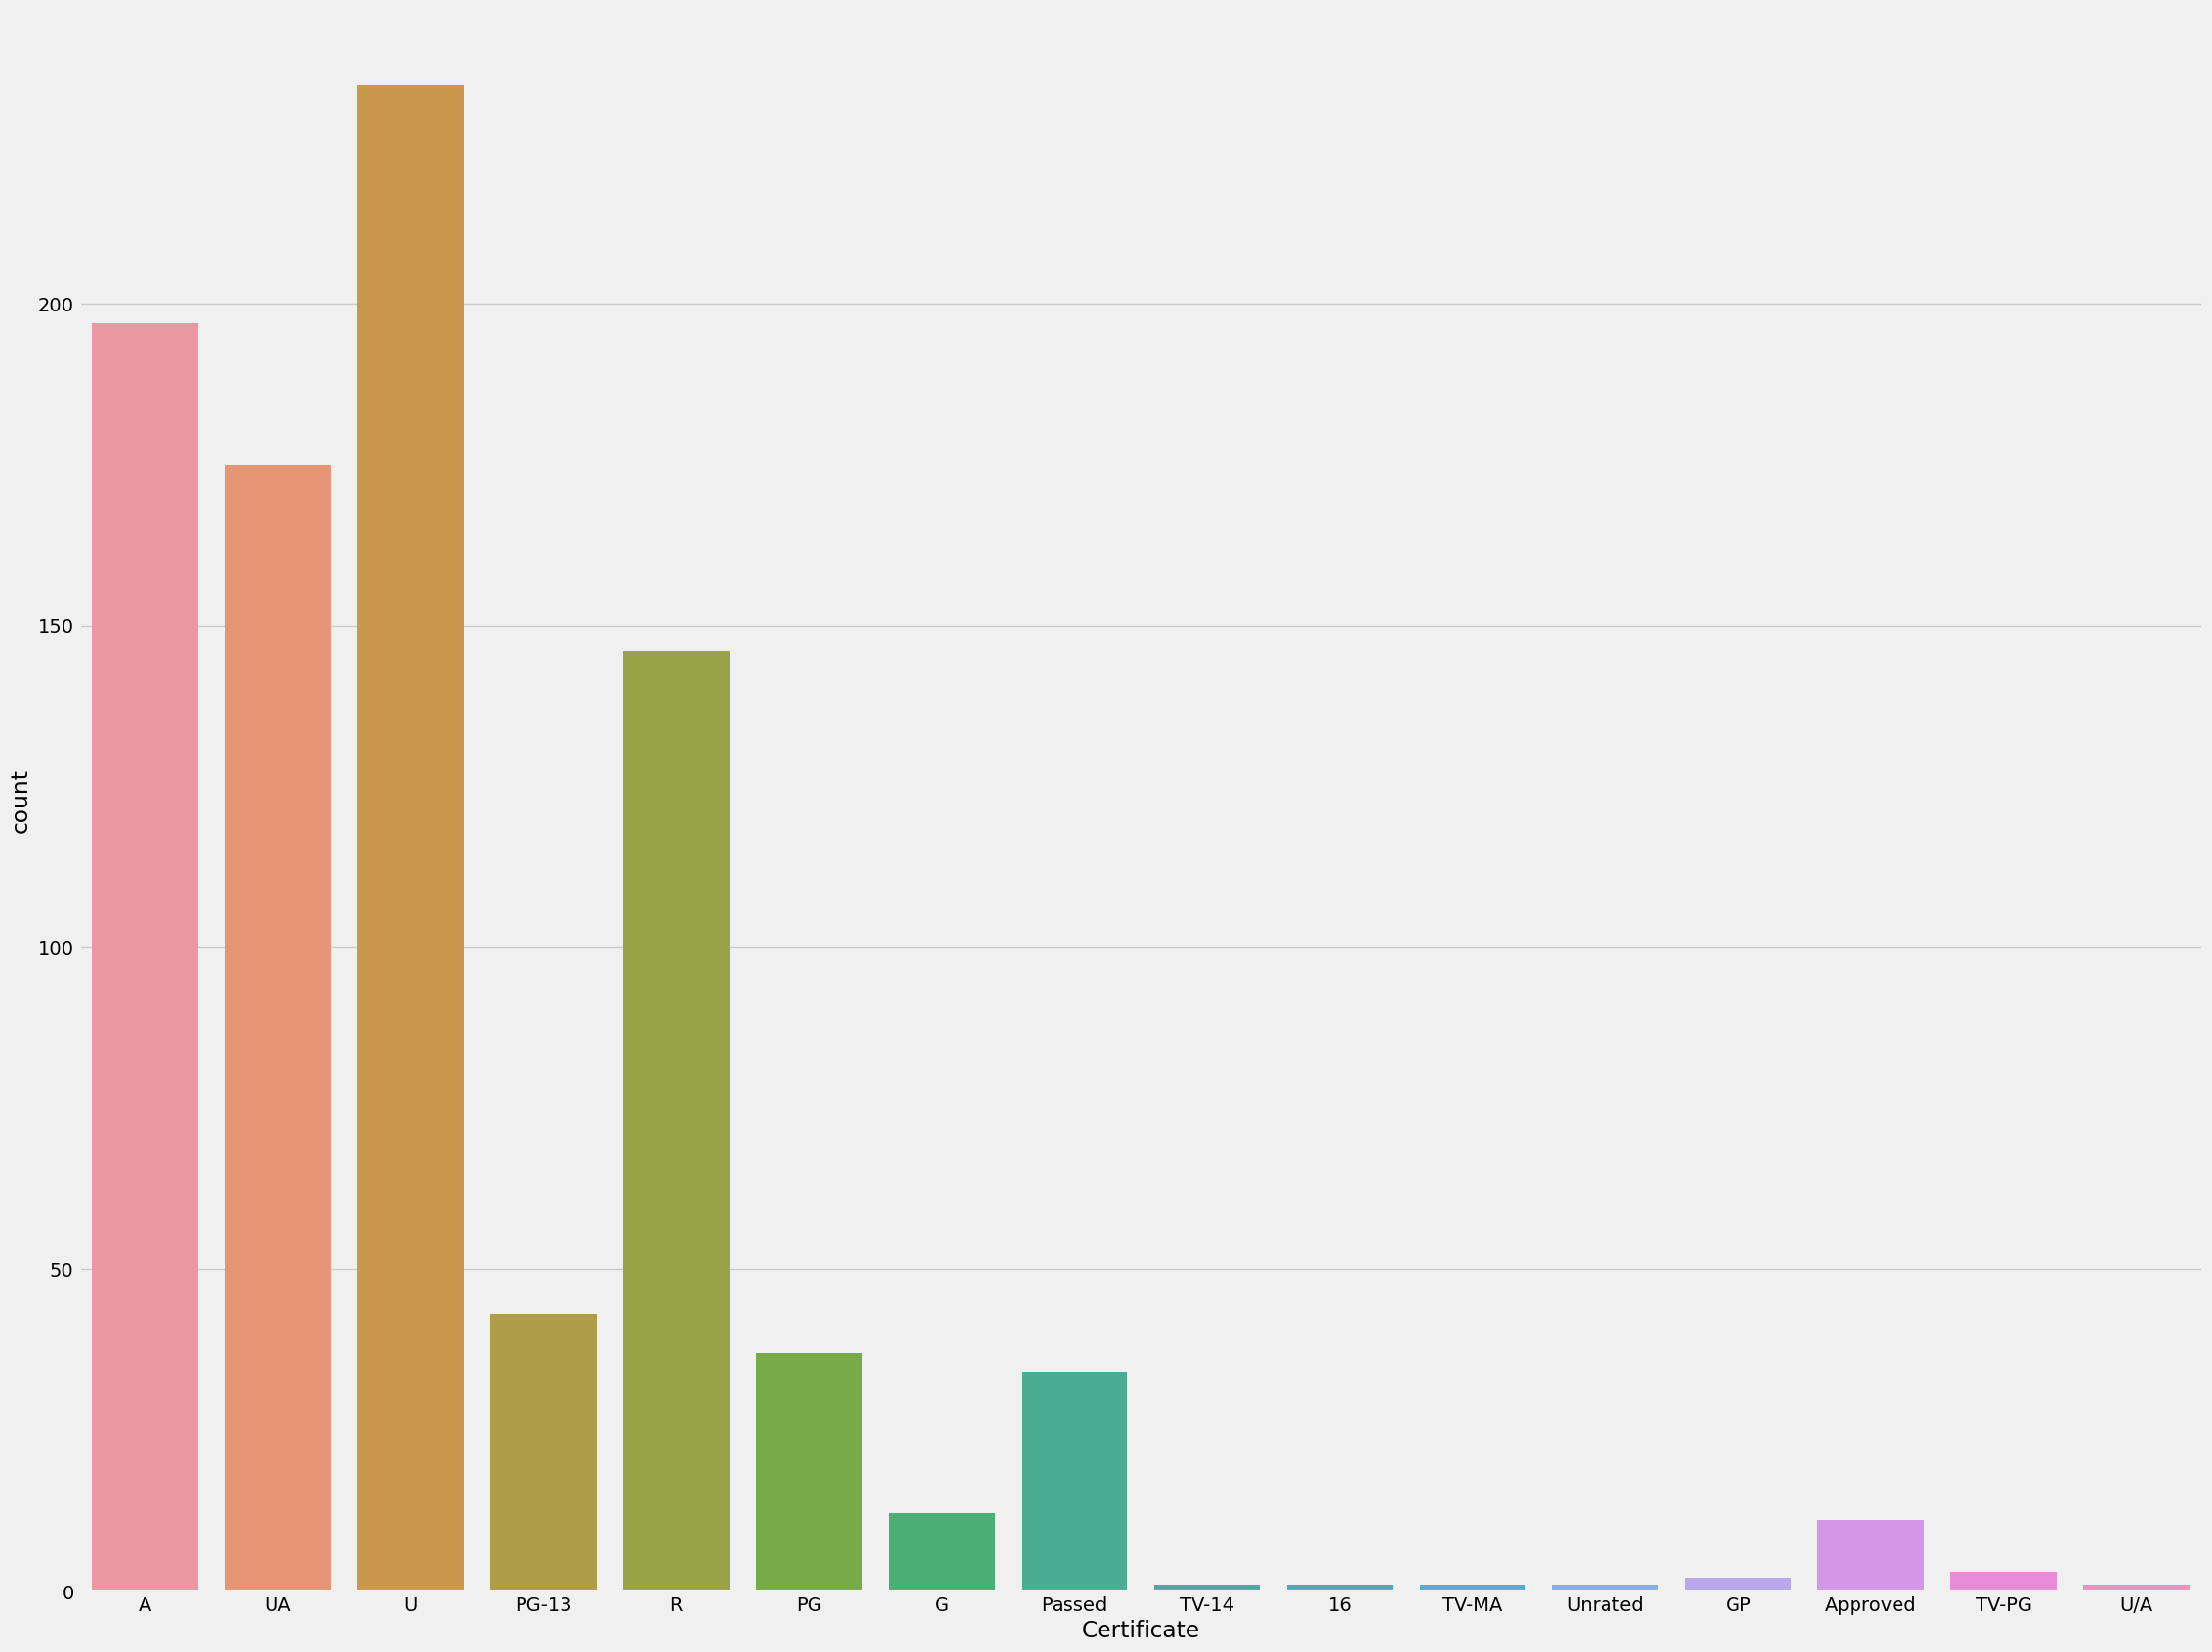

In [18]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(25,20))
ax = sns.countplot(x='Certificate', data=df)

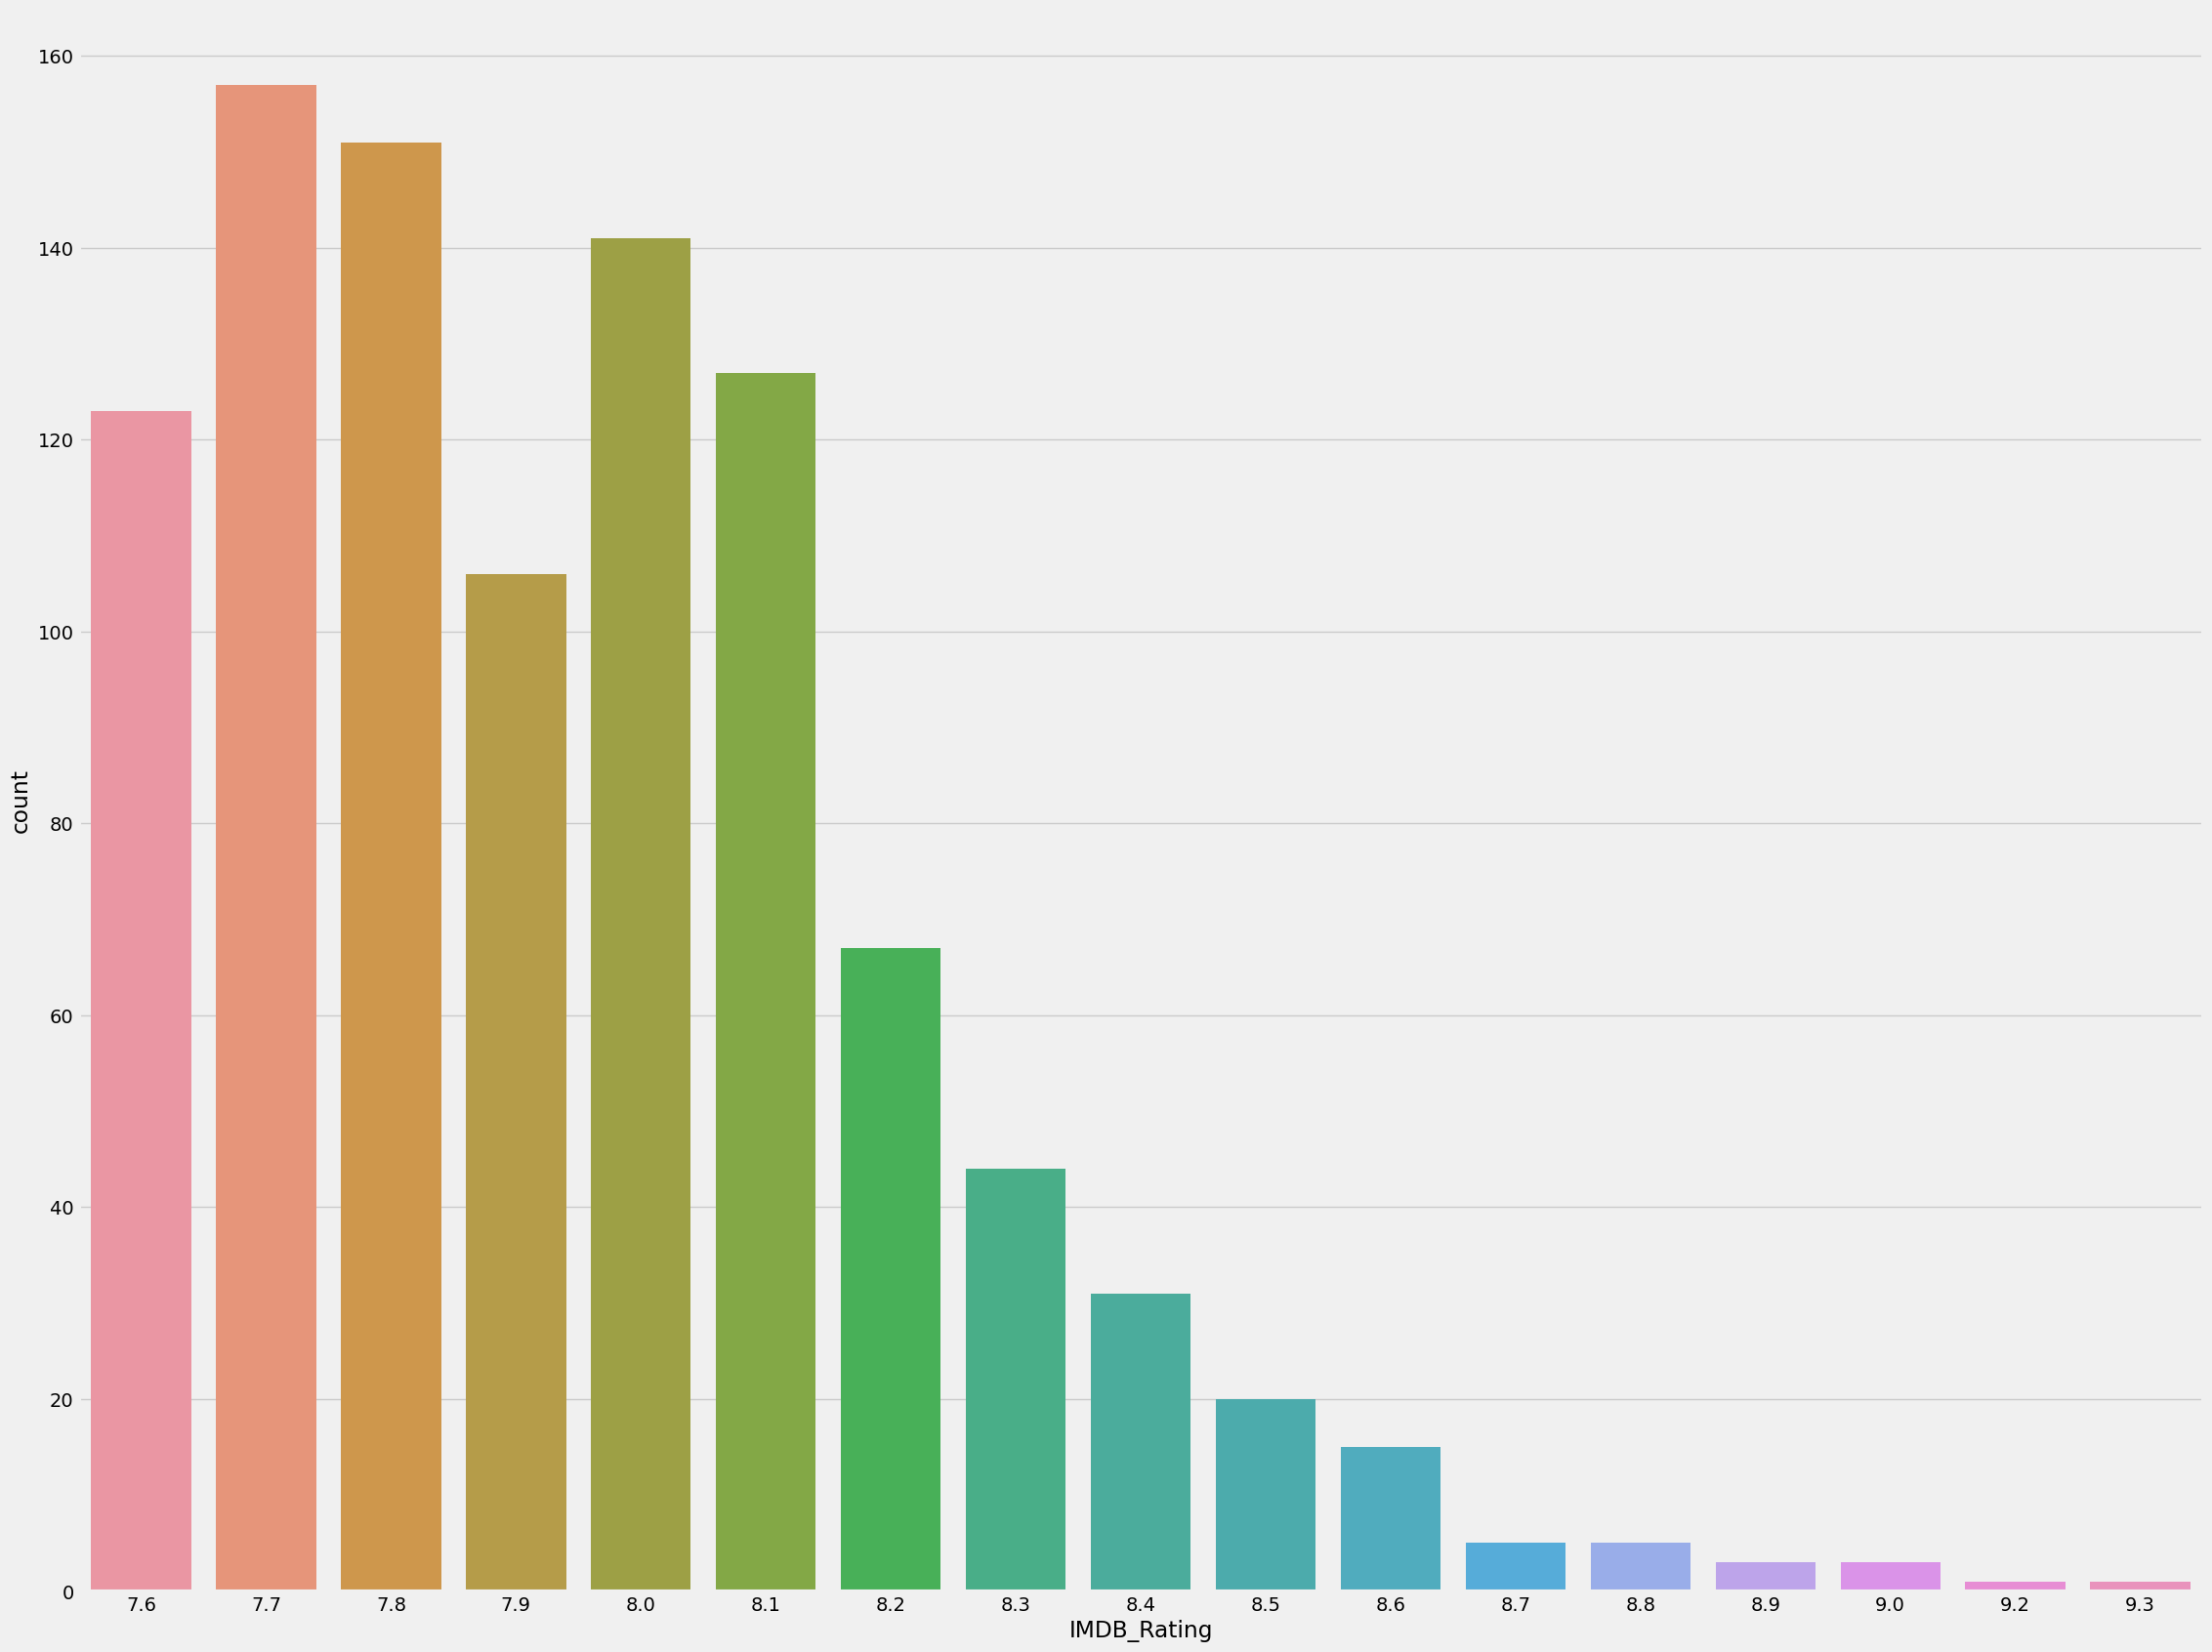

In [19]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(25,20))
ax = sns.countplot(x='IMDB_Rating', data=df)

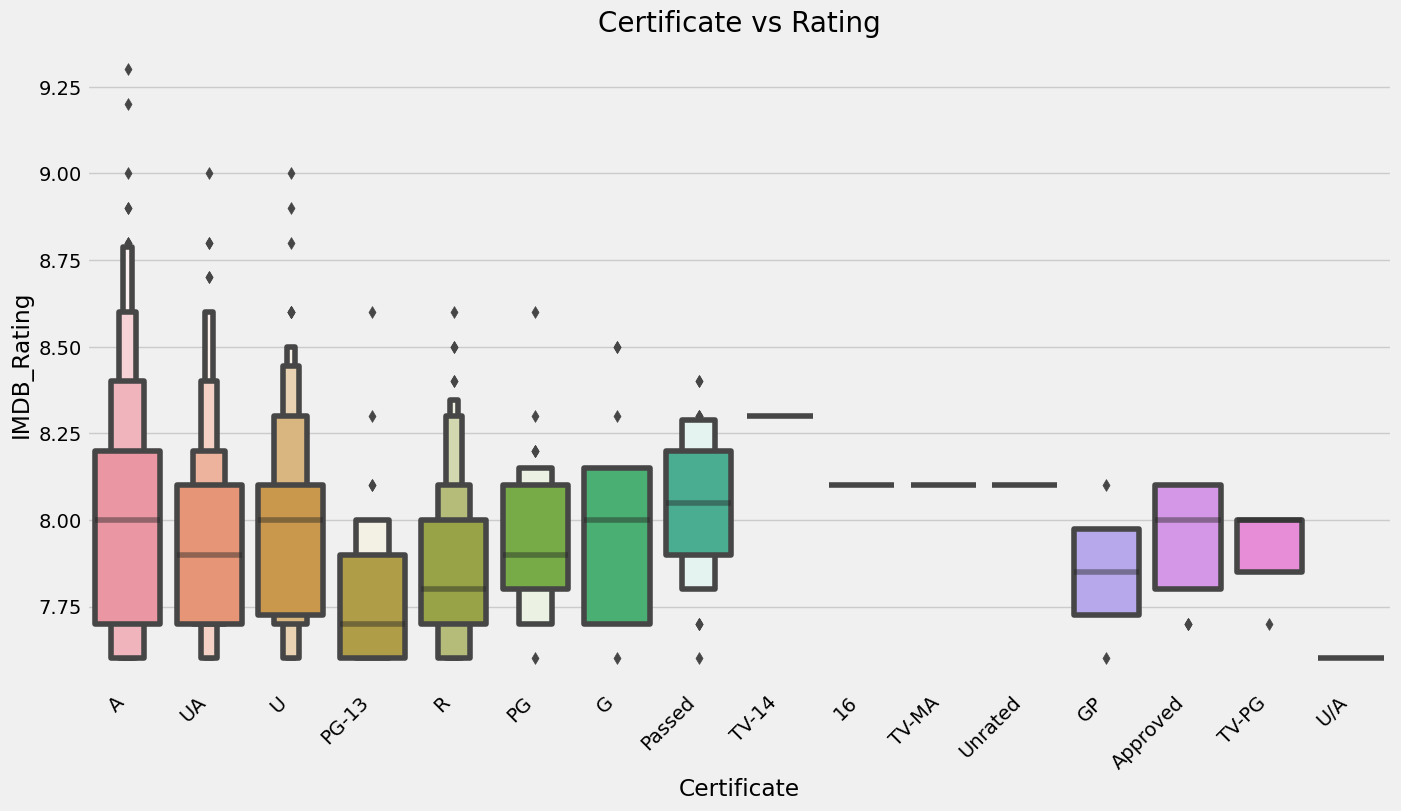

In [20]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(data=df, x='Certificate', y='IMDB_Rating')
plt.title('Certificate vs Rating', fontsize=20)
plt.xticks(rotation=45, ha='right')  # set the x-axis tick labels
plt.show()

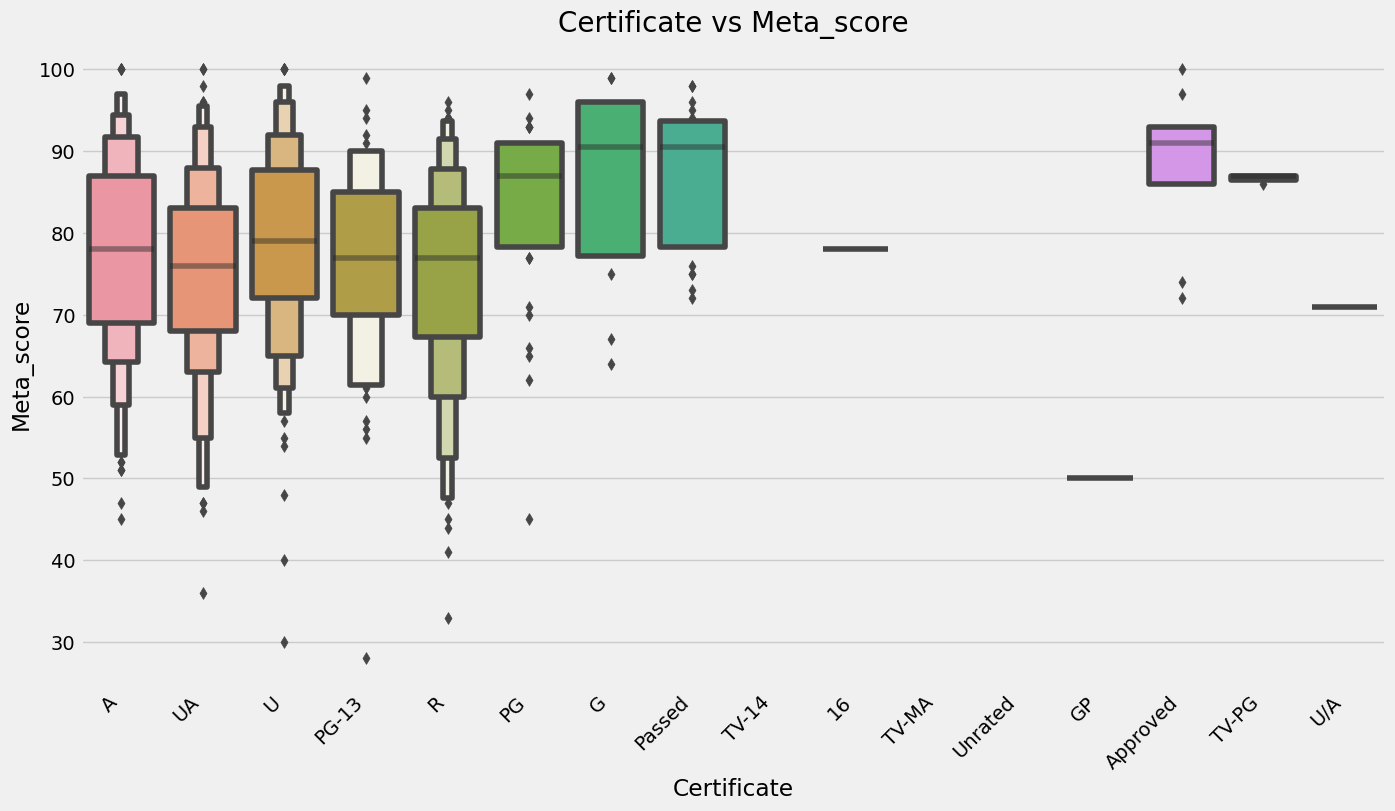

In [21]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(data=df, x='Certificate', y='Meta_score')
plt.title('Certificate vs Meta_score', fontsize=20)
plt.xticks(rotation=45, ha='right')  # set the x-axis tick labels
plt.show()

<AxesSubplot:>

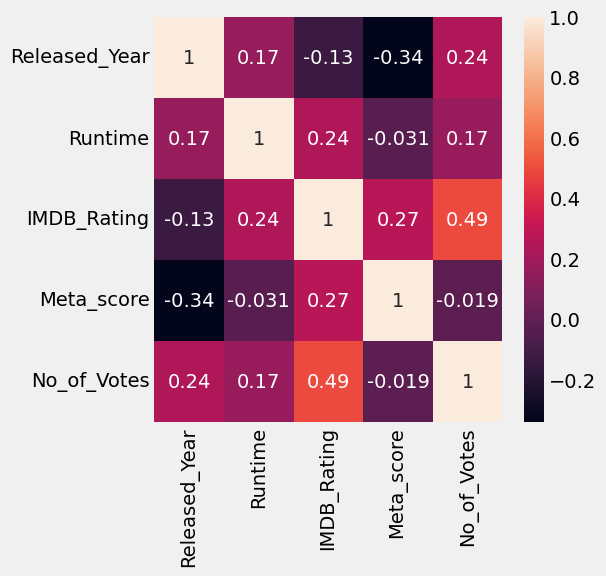

In [22]:
#code snippet uses the heatmap function from the seaborn module to plot a heatmap of the correlation matrix of the dataframe 'merged_df
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
     

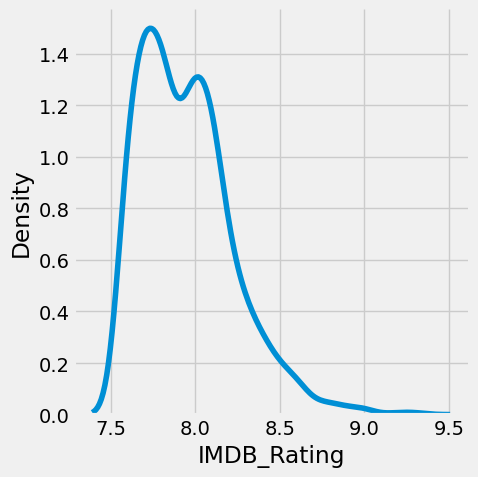

In [23]:
plt.style.use('fivethirtyeight')
sns.displot(data = df , x = 'IMDB_Rating' , kind = 'kde', palette = 'PuRd')

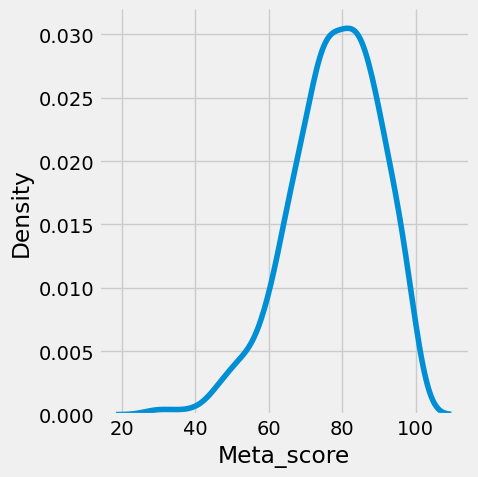

In [24]:
plt.style.use('fivethirtyeight')
sns.displot(data = df , x = 'Meta_score' , kind = 'kde', palette = 'PuRd')

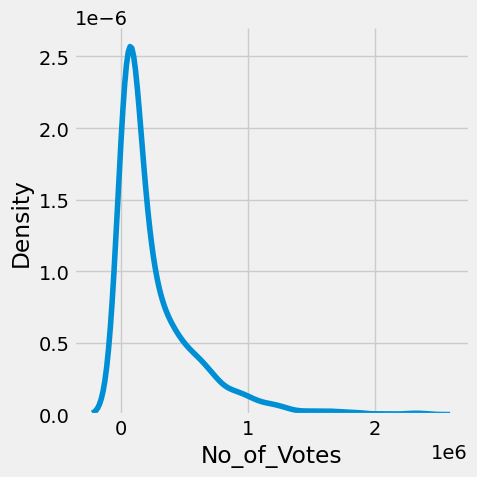

In [25]:
plt.style.use('fivethirtyeight')
sns.displot(data = df , x = 'No_of_Votes' , kind = 'kde', palette = 'PuRd')

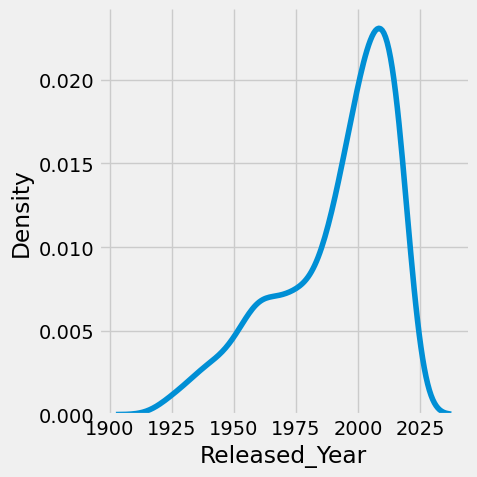

In [28]:
plt.style.use('fivethirtyeight')
sns.displot(data = df , x = 'Released_Year' , kind = 'kde', palette = 'PuRd')

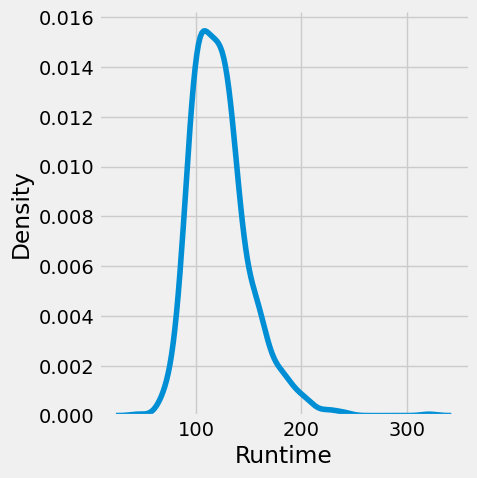

In [29]:
plt.style.use('fivethirtyeight')
sns.displot(data = df , x = 'Runtime' , kind = 'kde', palette = 'PuRd')

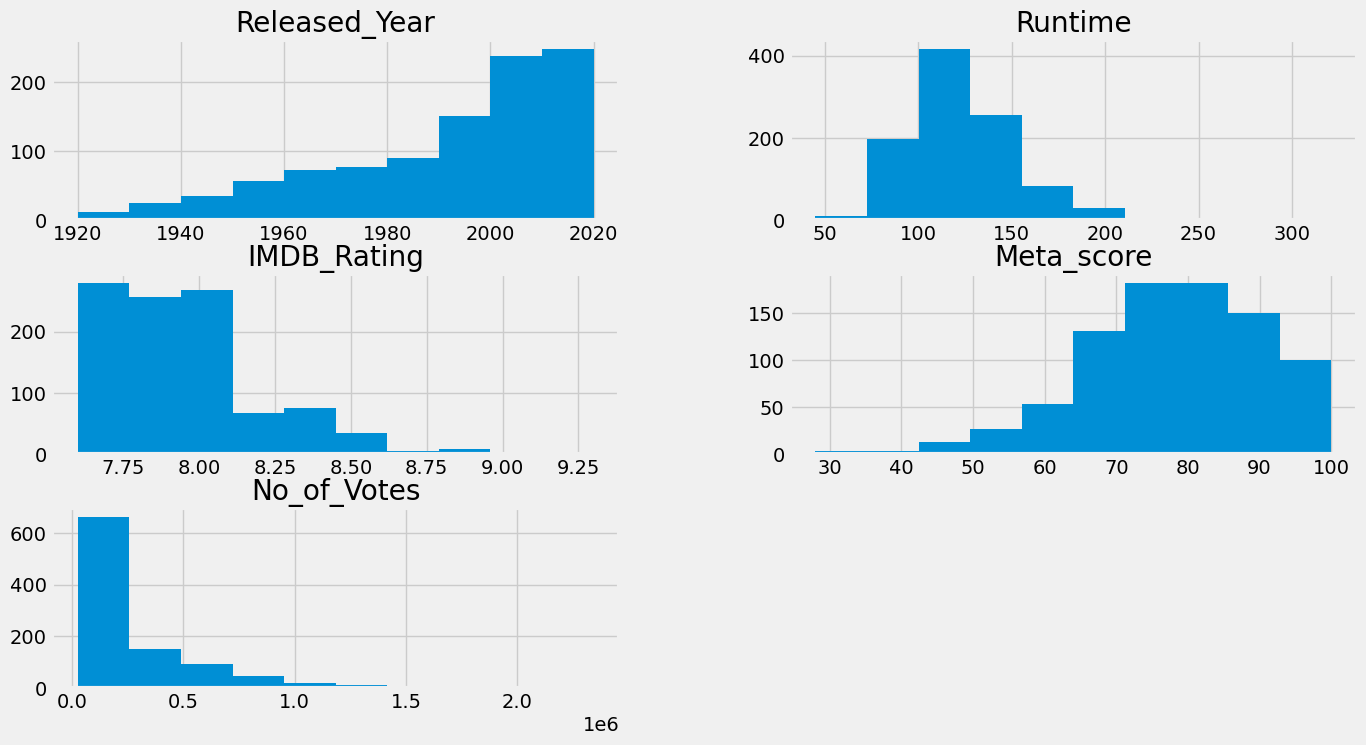

In [27]:
df.hist();

# Data Cleaning

In [34]:
#checking the missing values
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

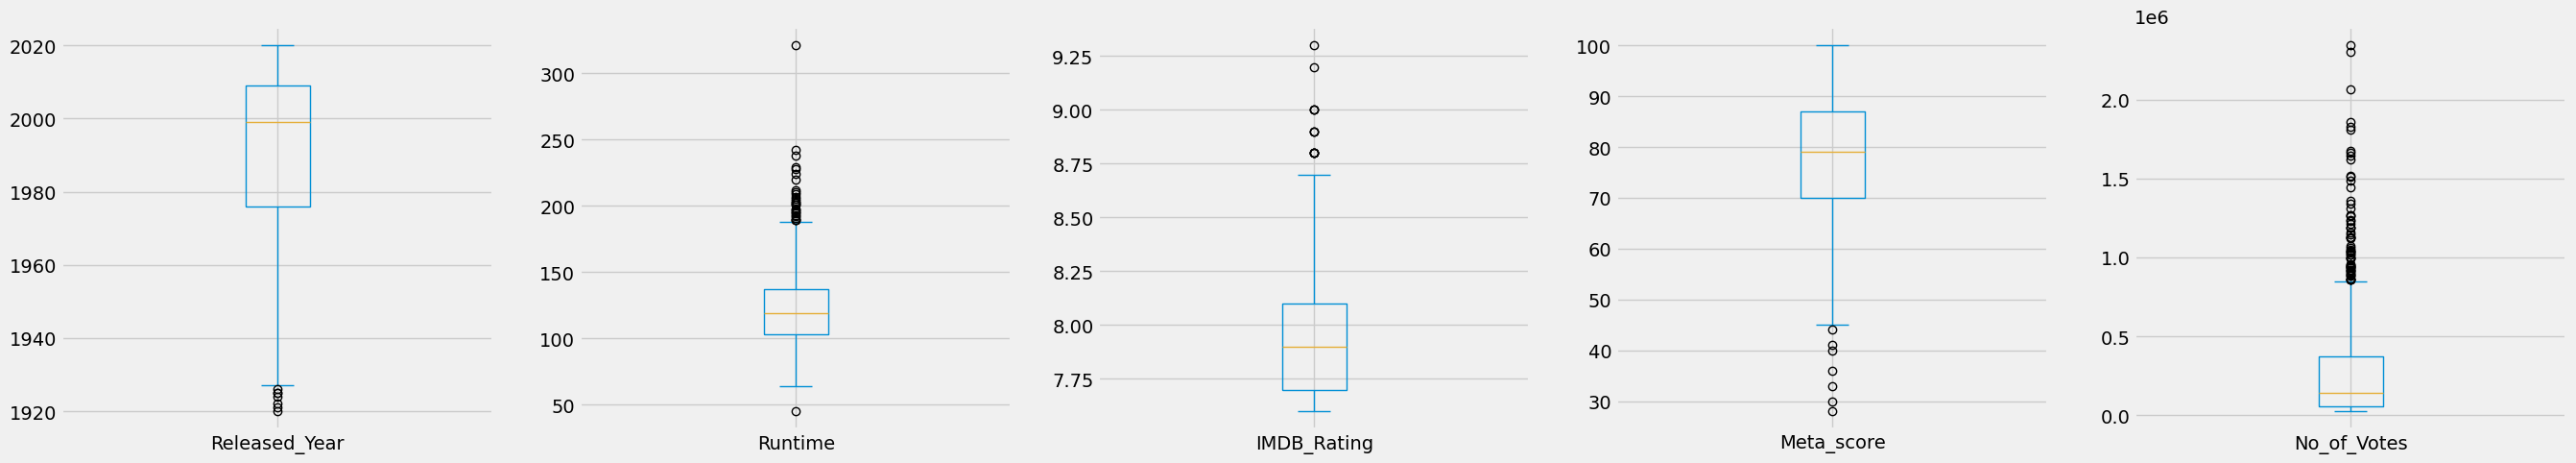

In [35]:
#to plot the outliers in the dataset
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(30,30))
plt.show()

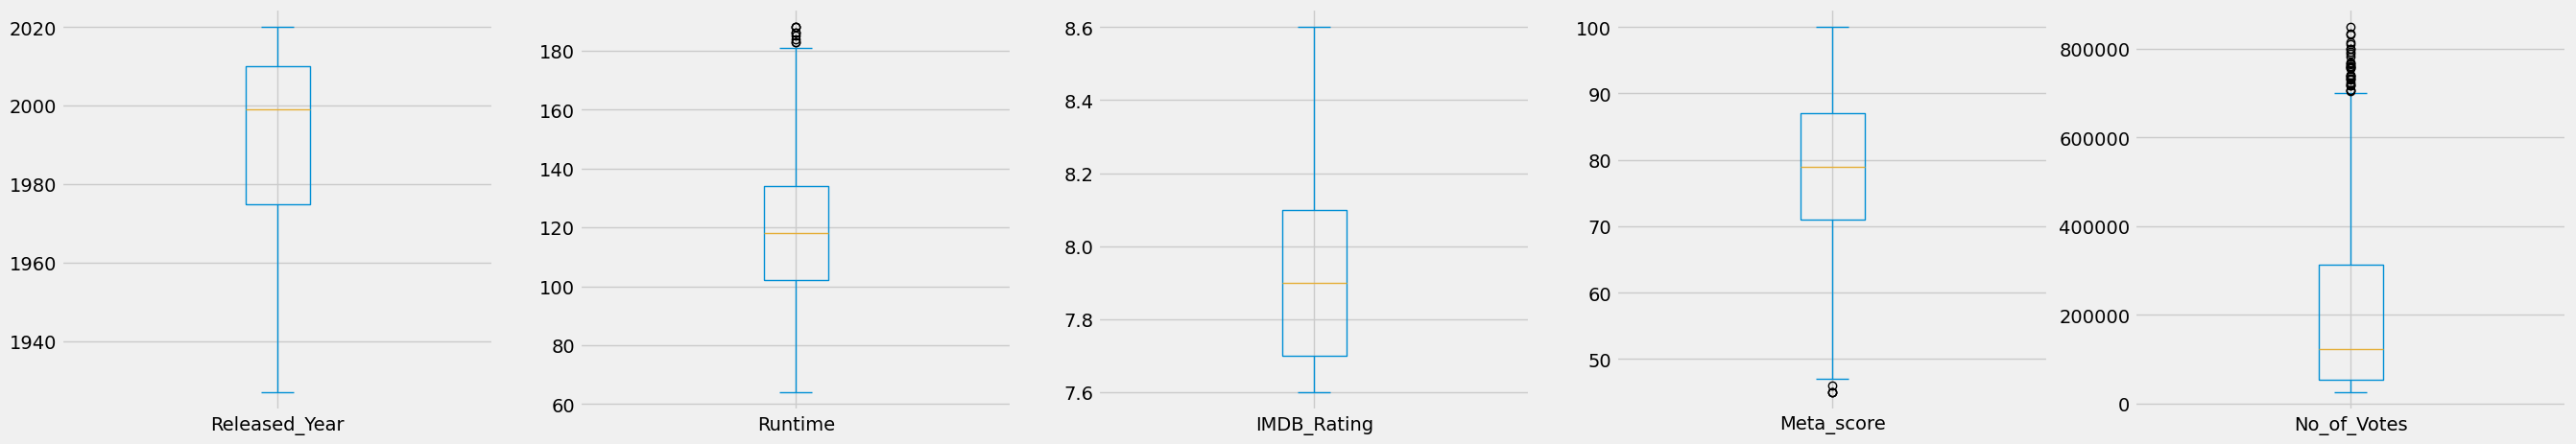

In [37]:
###After removing Outliers in the dataset
cols = ["Released_Year","Runtime","IMDB_Rating","Meta_score","No_of_Votes"]

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

df_box = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_box.plot(kind='box',subplots=True,layout=(5,5),figsize=(30,30))
plt.show()

In [38]:
# missing value treatment using mean for data
mean_Meta_score= df['Meta_score'].mean()
df['Meta_score'] = df['Meta_score'].fillna(mean_Meta_score)

In [39]:
# Impute missing values in train data with mode
cols_to_impute = ['Certificate', 'Gross']
for col in cols_to_impute:
    if df[col].dtype == 'O': # check if column is categorical
        mode_col = df[col].mode()[0] # calculate mode of column
        df[col].fillna(mode_col, inplace=True) # replace missing values with mode

# Check for missing values after imputation
print(df.isnull().sum())

Poster_Link      0
Series_Title     0
Released_Year    1
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [46]:
# Drop the row containing the missing value in the 'Released_Year' feature
df.dropna(subset=['Released_Year'], inplace=True)

In [47]:
df.shape

(999, 16)

In [48]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

<AxesSubplot:>

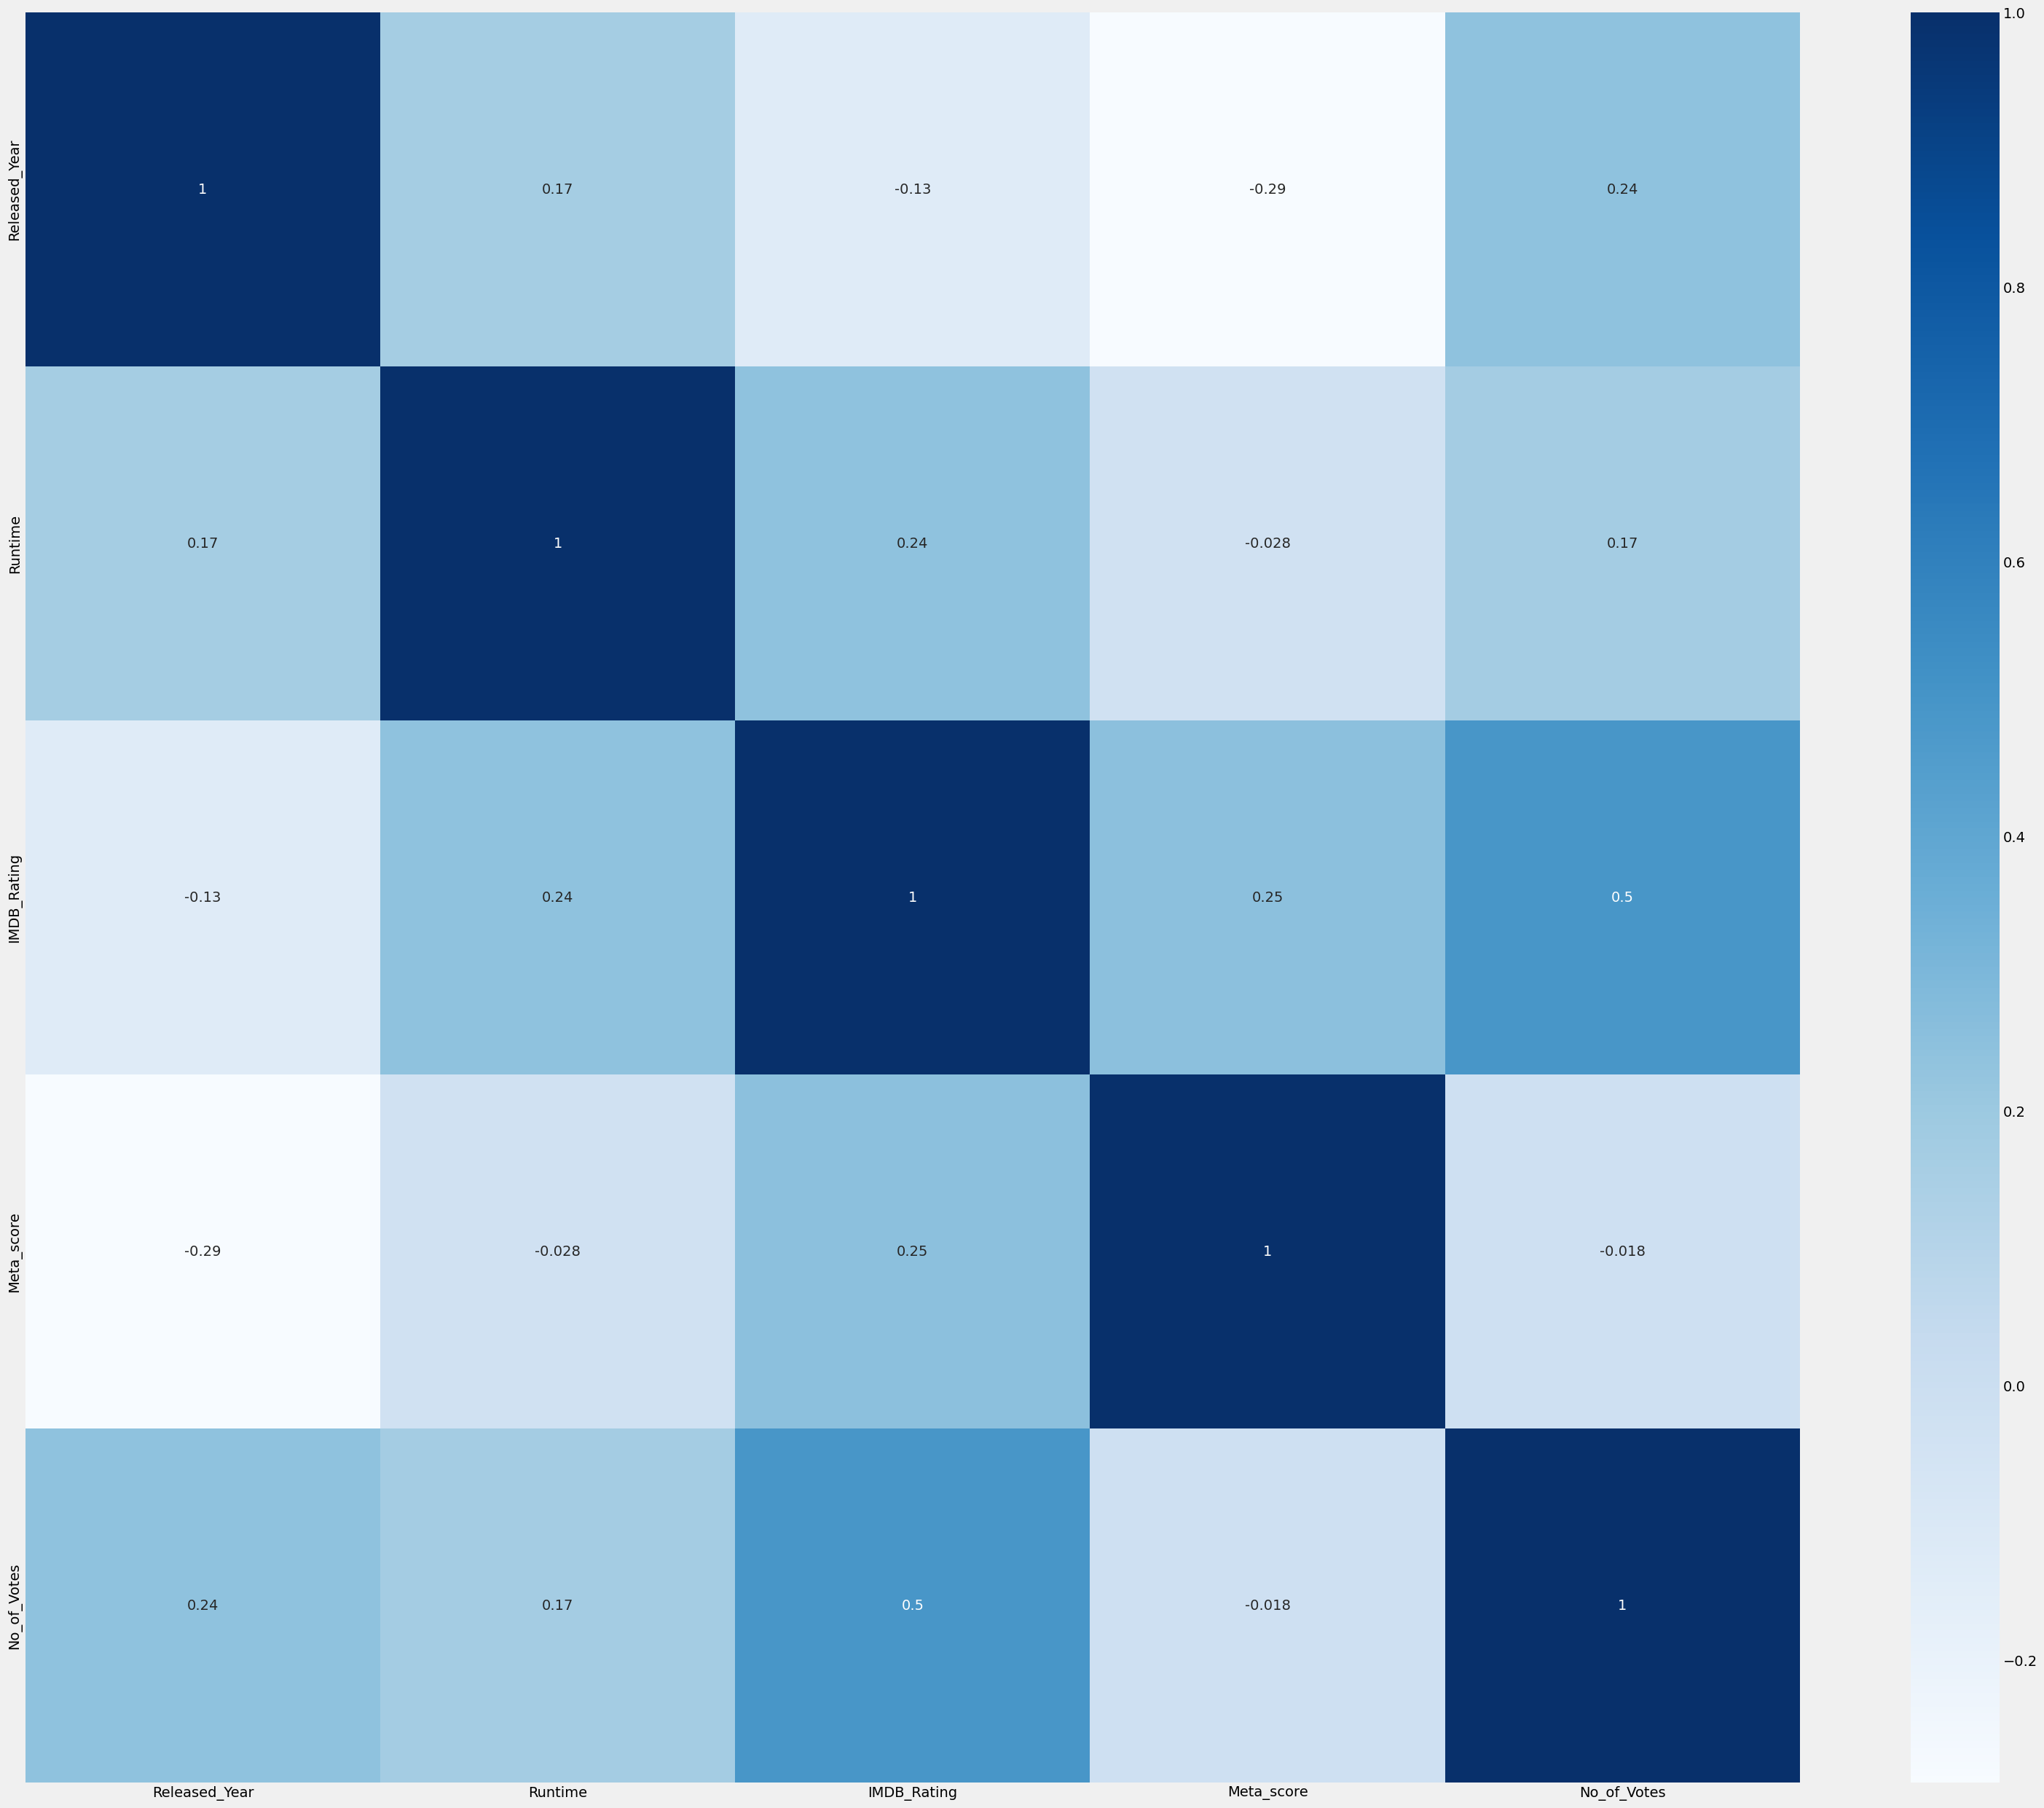

In [52]:
#code snippet uses the heatmap function from the seaborn module to plot a heatmap of the correlation matrix of the dataframe 'merged_df
import seaborn as sns
plt.figure(figsize=(35,30))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
     